<a href="https://www.kaggle.com/code/ankit07chy/254-257?scriptVersionId=253683715" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [1]:
# Your code goes here
link = 'https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view'
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
! pip install gdown


In [3]:
import gdown

# Google Drive file ID
file_id = "17cbDNBmys04MJqQfrma3jd72VPMnxIq0"
url = f"https://drive.google.com/uc?id={file_id}"

# Output filename (change if needed)
output = "dataset.csv"  # or .xlsx, depending on the file type

# Download the file
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=17cbDNBmys04MJqQfrma3jd72VPMnxIq0
To: /kaggle/working/dataset.csv
100%|██████████| 10.1k/10.1k [00:00<00:00, 10.1MB/s]


'dataset.csv'

In [4]:
df = pd.read_csv(output)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.iloc[:,0:9].values
y = df.iloc[:,9:]

In [10]:
X = df.iloc[:,0:9].values
y = df.iloc[:,9:]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

In [12]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train,y_train)
print('accuracy score =>',accuracy_score(y_test,knn.predict(X_test)))

accuracy score => 0.7441860465116279


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [13]:
# lets apply something advance
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1)
knn.fit(X_train,y_train)
print('accuracy score =>',accuracy_score(y_test,knn.predict(X_test)))

accuracy score => 0.6976744186046512


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [14]:
#just to dec time and space complexity.
knn = KNeighborsClassifier(n_neighbors = 3,algorithm ='kd_tree', metric = 'minkowski', p = 1)
knn.fit(X_train,y_train)
print('accuracy score =>',accuracy_score(y_test,knn.predict(X_test)))

accuracy score => 0.6976744186046512


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [16]:
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

In [17]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

print('accuracy score clf1 =>',accuracy_score(y_test,clf1.predict(X_test)))
print('accuracy score clf2 =>',accuracy_score(y_test,clf2.predict(X_test)))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score clf1 => 0.7209302325581395
accuracy score clf2 => 0.7906976744186046


In [18]:
# if multiplse col in classification
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length','sepal_width','petal_length','petal_width','species']
df1 = pd.read_csv(url, header=None, names=col_names)
df1.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
from sklearn.preprocessing import LabelEncoder
ll = LabelEncoder()

In [20]:
df1['species'] = ll.fit_transform(df1['species'])

In [21]:
df1['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [22]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
X = df1.iloc[:,0:4].values
y = df1.iloc[:,4:]

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =42)
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
print('accuracy score clf1 =>',accuracy_score(y_test,clf1.predict(X_test)))
print('accuracy score clf2 =>',accuracy_score(y_test,clf2.predict(X_test)))

accuracy score clf1 => 1.0
accuracy score clf2 => 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


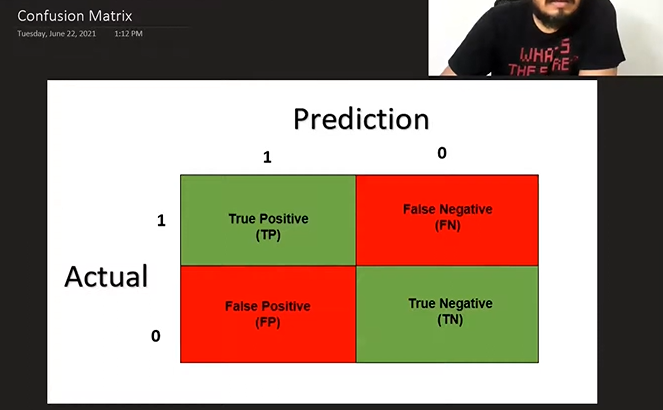

In [25]:
# confusion metix
from sklearn.metrics import accuracy_score, confusion_matrix
print('confusion metrix \n ',confusion_matrix(y_test,clf1.predict(X_test)))

confusion metrix 
  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Axes: >

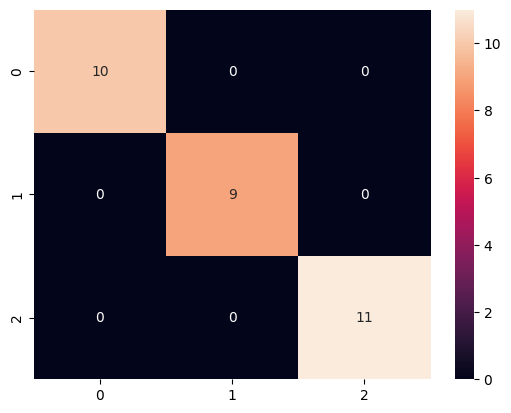

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,clf1.predict(X_test)),annot=True)


<Axes: >

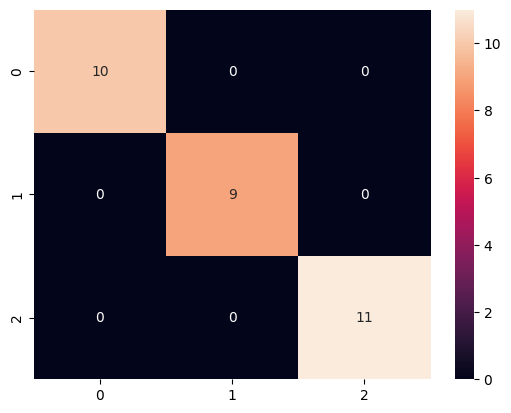

In [27]:
sns.heatmap(confusion_matrix(y_test,clf2.predict(X_test)),annot=True)

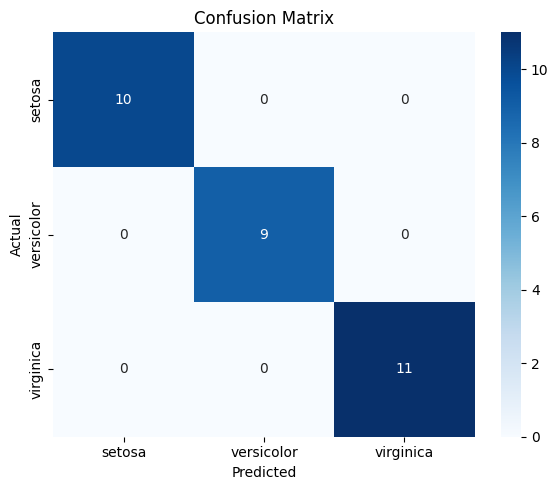

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix
cm = np.array([[10, 0, 0],
               [0, 9, 0],
               [0, 0, 11]])

# Optional: class labels
labels = ['setosa', 'versicolor', 'virginica']

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


- accuracy is not good if data is not symmetric in that case presicion and recall is good.
- 

In [29]:
accuracy_score(y_test,clf1.predict(X_test))

1.0

In [30]:
# precision.
from sklearn.metrics import precision_score, recall_score, f1_score

In [31]:
print('precision',precision_score(y_test,clf1.predict(X_test),average='macro'))
print('recall',recall_score(y_test,clf1.predict(X_test),average='macro'))
print('f1',f1_score(y_test,clf1.predict(X_test),average='macro'))

precision 1.0
recall 1.0
f1 1.0


In [32]:
# for multiclassificationn
# use average = 'macro', 
# average = NOne give for all class,


In [33]:
print('precision',precision_score(y_test,clf1.predict(X_test),average=None))
print('recall',recall_score(y_test,clf1.predict(X_test),average=None))
print('f1',f1_score(y_test,clf1.predict(X_test),average=None))

precision [1. 1. 1.]
recall [1. 1. 1.]
f1 [1. 1. 1.]
